CASE STUDY: CAR ACCIDENT SEVERITY

IBM APPLIED DATA SCIENCE SPECIALIZATION CAPSTONE <br>
Prepared By Abang Emenyi

1. INTRODUCTION

1.1. The Business Case <br>

Of the major modes of transportation, namely: Air, Rail, Sea, and Road; it is well known that road transportation presents the highest risk to travel. Road travel accidents occur more frequently than accidents by air, rail, or sea travel. Several factors contribute to road accidents. Some are caused by road users, for example, over speeding, and drunk driving, while others are caused by the elements, such as weather, and road conditions. While a factor like the behavior of a road user is quite unpredictable, other factors like the weather, and the state of the roads, are quite predictable. If these predictable factors are studied, and information gathered from them is disseminated to road users, the outcome may be a reduction in the frequency of road accidents.

The objective of this project, is to develop an early warning system, that could advise road users on the possibility of getting involved in a car accident, and how severe that accident might be, all based on the factors such as weather and road conditions at the time.

1.2. Stakeholders <br>
The major beneficiaries of this would be road users, who would be able to decide to drive more safely, or even completely change their travel plans based on the information provided. Other beneficiaries are first responders, as the resources they would deploy to attend to car accidents, would reduce if the early warning system indeed leads to a reduction in frequency of accidents.

while others are natural Within road travel itself, interstate highways are more prone to accidents than intra state roads and streets. a sizeable number of accidents that occur, do so on highways (routes that facilitate interstate travel). There are a variety of factors that can cause road accidents

2. DATA

2.1. Data Understanding <br>
As this is a supervised machine learning project, the data to be used is labelled. The index column of the data contains the dependent/target variable, which classifies the probability of an accident occurring into 2 categories, which are “2” (Injury Collision) and “1” (Property Damage Only Collision). <br>

To start, I first imported necessary libraries, and then read the data into a dataframe


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

SEVERITYCODE is the target value so i had a look to see how many classes are there in it.

In [4]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

There are 2 classes in SEVERITYCODE, '1' and '2'. However, i noticed that class '1' is almost 3 times larger than class '2'. This makes the data unbalanced, meaning there is need to balance it.

In [18]:
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE==1]
df_min = df[df.SEVERITYCODE==2]

df_maj_dsample = resample(df_maj,
                                replace=False,
                                n_samples=58188,
                                random_state=123)

balanced_df = pd.concat([df_maj_dsample, df_min])

balanced_df.SEVERITYCODE.value_counts()

1    58188
2    57223
Name: SEVERITYCODE, dtype: int64

In [5]:
all(isinstance(column, str) for column in df.columns)

True

In order to explore the data, i had to downoad seaborn, so that with it, i could plot some columns to understand the data better.

In [6]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

There are some attributes of the data which do not seem to add any value to the information we want to ascertain. For example, the following attributes: "ObejctID", "INCKEY", "COLDETKEY' and "REPORTNO" were all a form of serializing the data and wouldn't bear any direct impact on the model. other attributes such as "INTKEY", "EXCEPTRSNCODE", and "EXCEPTRSNDESC", had mostly empty rows and as such were not considered to have enough computational data. The first two attributes are gps cordinates and have no bearing on the model. After checking all columns, i found only the following attributes to be of value to continue with for further analyses: "ADDRTYPE", "WEATHER", "ROADCOND", and "LIGHTCOND". I then proceeded to plot some of these columns.

In [11]:
df_seattle = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df_seattle.head(9)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight


In [12]:
import seaborn as sns

df = df[df['ROADCOND'] !='Unknown']
df = df[df['WEATHER'] !='Unknown']



In [14]:
df['ROADCOND'] = df['ROADCOND'].astype("|S")
df['WEATHER'] = df['WEATHER'].astype("|S")

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

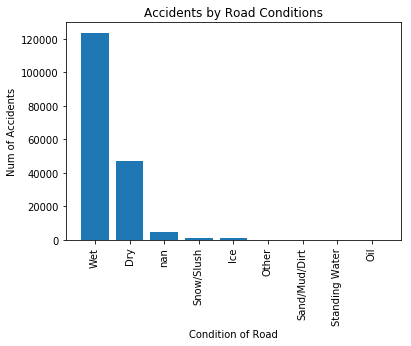

In [15]:
X = df.ROADCOND.unique()
Data = df.ROADCOND.value_counts()
plt.bar(X,height=Data)
plt.xlabel('Condition of Road')
plt.ylabel('Num of Accidents')
plt.title('Accidents by Road Conditions')
plt.xticks(rotation = 90)

First, i plotted the road condition attribute against the number of accidents, to see which road conditions caused the most accidents. The graph revealed that wet roads did.

Next, I did a value count on the WEATHER attribute. Surprisingly, the outcome suggested that most accidents occured when the weather was "clear". However, it also showed that when the weather was not clear, most accidents happened when it was "raining".

In [20]:
df["WEATHER"].value_counts()

b'Clear'                       110625
b'Raining'                      33107
b'Overcast'                     27360
b'nan'                           5071
b'Snowing'                        899
b'Fog/Smog/Smoke'                 562
b'Other'                          294
b'Sleet/Hail/Freezing Rain'       113
b'Blowing Sand/Dirt'               54
b'Severe Crosswind'                25
b'Partly Cloudy'                    5
Name: WEATHER, dtype: int64

In [25]:
df_seattle = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df_seattle.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,b'Overcast',b'Wet',Daylight
1,1,b'Raining',b'Wet',Dark - Street Lights On
2,1,b'Overcast',b'Dry',Daylight
3,1,b'Clear',b'Dry',Daylight
4,2,b'Raining',b'Wet',Daylight


Netx, i converted some categorical features to numerical values

In [24]:
df_seattle.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                      SEVERITYCODE
b'Blowing Sand/Dirt'         1               0.722222
                             2               0.277778
b'Clear'                     1               0.676529
                             2               0.323471
b'Fog/Smog/Smoke'            1               0.670819
                             2               0.329181
b'Other'                     1               0.717687
                             2               0.282313
b'Overcast'                  1               0.682164
                             2               0.317836
b'Partly Cloudy'             2               0.600000
                             1               0.400000
b'Raining'                   1               0.662670
                             2               0.337330
b'Severe Crosswind'          1               0.720000
                             2               0.280000
b'Sleet/Hail/Freezing Rain'  1               0.752212
                             2          

In [26]:
df_seattle.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND           SEVERITYCODE
b'Dry'             1               0.677063
                   2               0.322937
b'Ice'             1               0.762996
                   2               0.237004
b'Oil'             1               0.606557
                   2               0.393443
b'Other'           1               0.635593
                   2               0.364407
b'Sand/Mud/Dirt'   1               0.671642
                   2               0.328358
b'Snow/Slush'      1               0.822368
                   2               0.177632
b'Standing Water'  1               0.722222
                   2               0.277778
b'Wet'             1               0.666766
                   2               0.333234
b'nan'             1               0.788242
                   2               0.211758
Name: SEVERITYCODE, dtype: float64

In [27]:
df_seattle.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.771186
                          2               0.228814
Dark - Street Lights Off  1               0.724199
                          2               0.275801
Dark - Street Lights On   1               0.694756
                          2               0.305244
Dark - Unknown Lighting   1               0.555556
                          2               0.444444
Dawn                      1               0.665842
                          2               0.334158
Daylight                  1               0.661869
                          2               0.338131
Dusk                      1               0.663612
                          2               0.336388
Other                     1               0.756219
                          2               0.243781
Unknown                   1               0.897611
                          2               0.102389
Name: SEVERITYCODE, dtype: float64

Next, I applied the following classifiers to train and test the model

K Nearest Neighbour (KNN) <br>
Decision Tree <br>
Support Vector Machine<br>

After this, i eveluated the model using the test set

In [31]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [32]:
df_seattle.dtypes
df_seattle = df_seattle[pd.to_numeric(df['WEATHER'], errors='coerce').notnull()]
df['WEATHER'] = df['WEATHER'].astype('int')
df.dtypes

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

ValueError: invalid literal for int() with base 10: b'Overcast'

In [29]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-09-11 15:39:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-09-11 15:39:36 (402 MB/s) - ‘loan_test.csv’ saved [3642/3642]

